In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Activation
import os
import cv2
import numpy as np
import shutil
import random
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelBinarizer as LabelBinarizer

DEFAULTCWD = os.getcwd() +"/"
print(DEFAULTCWD)
data_folder_path = 'datasets/'
dirs = os.listdir(data_folder_path)
print(dirs)
print("READY")

Using TensorFlow backend.


D:\BigDataApps\PythonProjects\PROJECT\MMA-Posture\ML/
['guard', 'jab', 'uppercut']
READY


## Grab data & Create labels

In [2]:
data = []
count = 0
labels = []
postureCount = 0
for pose in dirs:
    print(pose)
    fileNames = os.listdir(data_folder_path + pose)
    print(data_folder_path + pose + "/" + str(fileNames))
    for file in fileNames:
        print("Processing: "+file)
        data.append(pd.read_csv(data_folder_path + pose + "/" + file).values)
        for i in range(len(data[count])):
            labels.append(postureCount)
        print(i)
        print(len(data[count]))
        count+=1
    postureCount+=1
#data[0] = pd.read_csv("datasets/jab/dataset_1591367620.csv").values
#data[1] =pd.read_csv("datasets/guard/dataset_1591367620.csv").values
print(len(labels))


guard
datasets/guard/['dataset_1591367620.csv']
Processing: dataset_1591367620.csv
676
677
jab
datasets/jab/['dataset_1591990868.csv', 'dataset_1592210553.csv']
Processing: dataset_1591990868.csv
816
817
Processing: dataset_1592210553.csv
484
485
uppercut
datasets/uppercut/['dataset_1592210553.csv']
Processing: dataset_1592210553.csv
834
835
2814


#### Just for checking data types, make sure there is no strings etc

In [3]:
#### CHECKING TYPES
def checkDataTypes(dataset):
    for one in dataset:
        print(type(one))
        for two in one:
            print(type(two))
            for three in two:
                print(type(three))
                for four in three:
                    print(type(four))

## Data Formatting
The data we get is string so we'll need to parse that to float. Besides that, this method also takes care of reshaping

In [4]:

import re
def formatDataset(data):
    dataset = []  
    count = 0
    for pose in data:
        for row in pose:
            dataset.append([]) #Person (useless dimension, but needed to get 4d)
            personCount = 0
            for person in range(1):
                dataset[count].append([]) #Frame (This is the actual keypoint array (aka 1 row in the excel))
                for cell in row: # The cell is a string (aka xyc) so we'll split by comma and format each number we get 
                    if cell == "0":
                        cell = "0,0,0"
                    if type(cell) != float:
                        buffer = cell.split(',')
                        array = np.empty(shape=len(buffer)) # Was necessary due to it being a float or something
                        i = 0
                        for number in buffer:
                            array[i] = float(number)
                            i+=1
                        #print(array)
                        dataset[count][personCount].append(array) # Put it in the main dataset
                personCount += 1
            count += 1
    return np.array(dataset) # Parse it into a numpy array and return! 
                            #(It was a Python array in the beginning) 
                            # Reason why it's like this is due to the 'efficency' of numpy arrays makes them not able to
                            # have data appended to them, the size of the array has to be known. 
                            # But Python array is easier to work with in this case


In [5]:
ds = formatDataset(data) 
# Checking if everything has the correct type
print(type(ds))
print(len(ds))
print(type(ds[0]))
print(len(ds[0]))
print(type(ds[0][0]))
print(len(ds[0][0]))
print(type(ds[0][0][0]))
print(len(ds[0][0][0]))
print(type(ds[0][0][0][0]))

# perform "one-hot" encoding on the labels (Make label into a number but still remember the string related to the number) 
# aka enum



print(len(labels))

#labels = lb.fit_transform(labels)
#print(len(labels))
#labels = labels.flatten()
#print(len(labels))

y = []
for label in labels:
    y.append(label)
y = np.array(y)    
y.reshape(-1)
something = np.eye(len(dirs))[y]
print(something)




<class 'numpy.ndarray'>
2814
<class 'numpy.ndarray'>
1
<class 'numpy.ndarray'>
25
<class 'numpy.ndarray'>
3
<class 'numpy.float64'>
2814
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [6]:
# Check how the dataset looks like and if the ds length vs label lenght is matching
print(len(labels))
print(len(ds))
print(ds)


2814
2814
[[[[1.23068e+03 2.74199e+02 8.40742e-01]
   [1.33079e+03 3.44966e+02 7.89760e-01]
   [1.28673e+03 3.62514e+02 6.92934e-01]
   ...
   [0.00000e+00 0.00000e+00 0.00000e+00]
   [0.00000e+00 0.00000e+00 0.00000e+00]
   [1.38966e+03 1.07491e+03 6.06459e-02]]]


 [[[1.23370e+03 2.77159e+02 8.77445e-01]
   [1.33079e+03 3.53642e+02 8.20089e-01]
   [1.28667e+03 3.65571e+02 7.23462e-01]
   ...
   [0.00000e+00 0.00000e+00 0.00000e+00]
   [0.00000e+00 0.00000e+00 0.00000e+00]
   [1.38678e+03 1.07491e+03 7.21354e-02]]]


 [[[1.23379e+03 2.74246e+02 8.94704e-01]
   [1.33083e+03 3.50724e+02 8.11966e-01]
   [1.28387e+03 3.65526e+02 7.07538e-01]
   ...
   [0.00000e+00 0.00000e+00 0.00000e+00]
   [0.00000e+00 0.00000e+00 0.00000e+00]
   [1.38972e+03 1.07491e+03 8.05632e-02]]]


 ...


 [[[1.26317e+03 1.53692e+02 5.92415e-01]
   [1.18947e+03 2.50648e+02 6.38516e-01]
   [1.10713e+03 2.30099e+02 5.76715e-01]
   ...
   [0.00000e+00 0.00000e+00 0.00000e+00]
   [0.00000e+00 0.00000e+00 0.00000e+00]


In [7]:
# split data into train and test
print(len(something))
print(len(ds))
from sklearn.model_selection import train_test_split

(trainX, testX, trainY, testY) = train_test_split(ds, something, test_size=0.25, stratify=labels, random_state=42)

print("SHAPES")
print("ORIGINAL SHAPE: "+ str(ds.shape))
print("TRAIN SINGLE SHAPE: "+ str(trainX[0].shape))
print("TRAIN ARRAY SHAPE: "+str(trainX.shape))
print("TEST SINGLE SHAPE: "+ str(testX[0].shape))
print("TEST ARRAY SHAPE: "+str(testX.shape))

2814
2814
SHAPES
ORIGINAL SHAPE: (2814, 1, 25, 3)
TRAIN SINGLE SHAPE: (1, 25, 3)
TRAIN ARRAY SHAPE: (2110, 1, 25, 3)
TEST SINGLE SHAPE: (1, 25, 3)
TEST ARRAY SHAPE: (704, 1, 25, 3)


In [8]:
from tensorflow.keras.regularizers import l2
# CONFIGS
init = "he_normal"
reg = l2(0.0005)
inputShape = (1,25,3)
chanDim = -1
classes = len(dirs) # len of labels (2 for now)
####



model = Sequential()

# This is mostly copied for Kim's link, I only changed the Conv2D things the example: (1,4)
# 16 FILTERS
# 7x7 filters -- 2x2 strides
# the spatial dimensions of the volume
model.add(Conv2D(16, (1, 4), strides=(2, 2), padding="valid",
    kernel_initializer=init, kernel_regularizer=reg,
    input_shape=inputShape))
# here we stack two CONV layers on top of each other where
# each layerswill learn a total of 32 (3x3) filters
model.add(Conv2D(32, (3, 3), padding="same",
    kernel_initializer=init, kernel_regularizer=reg))
model.add(Activation("relu"))
#model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(32, (3, 3), strides=(2, 2), padding="same",
    kernel_initializer=init, kernel_regularizer=reg))
model.add(Activation("relu"))
#model.add(BatchNormalization(axis=chanDim))
model.add(Dropout(0.25))

# stack two more CONV layers, keeping the size of each filter

# as 3x3 but increasing to 64 total learned filters
model.add(Conv2D(64, (2, 2), padding="same",
    kernel_initializer=init, kernel_regularizer=reg))
model.add(Activation("relu"))
#model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (2, 6), strides=(2, 2), padding="same",
    kernel_initializer=init, kernel_regularizer=reg))
model.add(Activation("relu"))
#model.add(BatchNormalization(axis=chanDim))
model.add(Dropout(0.25))

# increase the number of filters again, this time to 128
model.add(Conv2D(128, (6, 4), padding="same",
    kernel_initializer=init, kernel_regularizer=reg))
model.add(Activation("relu"))
#model.add(BatchNormalization(axis=chanDim))

model.add(Conv2D(128, (3, 3), strides=(2, 2), padding="same",
    kernel_initializer=init, kernel_regularizer=reg))
model.add(Activation("relu"))
#model.add(BatchNormalization(axis=chanDim))
model.add(Dropout(0.25))

# fully-connected layer
model.add(Flatten())
model.add(Dense(512, kernel_initializer=init))
model.add(Activation("relu"))
#model.add(BatchNormalization())
model.add(Dropout(0.5))
# softmax classifier
model.add(Dense(classes))
model.add(Activation("softmax"))

print("MODEL PREPARED")


MODEL PREPARED


In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
print("MODEL COMPILED")

MODEL COMPILED


In [10]:
history = model.fit(trainX, trainY, batch_size=32,
    validation_data=(testX, testY), epochs=200) # Change to 20 epochs when testing 

print("TRAINING COMPLETE")


Train on 2110 samples, validate on 704 samples
Epoch 1/200
2110/2110 [==============================] - 2s 863us/step - loss: 6.0610 - accuracy: 0.6246 - val_loss: 0.6982 - val_accuracy: 0.8040
Epoch 2/200
2110/2110 [==============================] - 1s 567us/step - loss: 0.8222 - accuracy: 0.7531 - val_loss: 0.5711 - val_accuracy: 0.8224
Epoch 3/200
2110/2110 [==============================] - 1s 655us/step - loss: 0.6837 - accuracy: 0.7645 - val_loss: 0.5210 - val_accuracy: 0.8295
Epoch 4/200
2110/2110 [==============================] - 1s 599us/step - loss: 0.6201 - accuracy: 0.7829 - val_loss: 0.5057 - val_accuracy: 0.8310
Epoch 5/200
2110/2110 [==============================] - 2s 809us/step - loss: 0.5719 - accuracy: 0.8118 - val_loss: 0.4827 - val_accuracy: 0.83520s - loss: 0
Epoch 6/200
2110/2110 [==============================] - 2s 895us/step - loss: 0.5699 - accuracy: 0.7905 - val_loss: 0.4697 - val_accuracy: 0.8480
Epoch 7/200
2110/2110 [==============================] - 2s

2110/2110 [==============================] - 2s 1ms/step - loss: 0.2206 - accuracy: 0.9403 - val_loss: 0.2268 - val_accuracy: 0.9403
Epoch 112/200
2110/2110 [==============================] - 2s 826us/step - loss: 0.2154 - accuracy: 0.9417 - val_loss: 0.2023 - val_accuracy: 0.9474
Epoch 113/200
2110/2110 [==============================] - 2s 804us/step - loss: 0.2174 - accuracy: 0.9431 - val_loss: 0.2141 - val_accuracy: 0.9474
Epoch 114/200
2110/2110 [==============================] - 2s 740us/step - loss: 0.2057 - accuracy: 0.9464 - val_loss: 0.2596 - val_accuracy: 0.9148
Epoch 115/200
2110/2110 [==============================] - 2s 711us/step - loss: 0.2273 - accuracy: 0.9398 - val_loss: 0.2544 - val_accuracy: 0.9361
Epoch 116/200
2110/2110 [==============================] - 2s 891us/step - loss: 0.2287 - accuracy: 0.9384 - val_loss: 0.2668 - val_accuracy: 0.9077
Epoch 117/200
2110/2110 [==============================] - 2s 985us/step - loss: 0.2257 - accuracy: 0.9351 - val_loss: 0.2

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 11, 16)         208       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 11, 32)         4640      
_________________________________________________________________
activation_1 (Activation)    (None, 1, 11, 32)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 6, 32)          9248      
_________________________________________________________________
activation_2 (Activation)    (None, 1, 6, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 6, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 6, 64)         

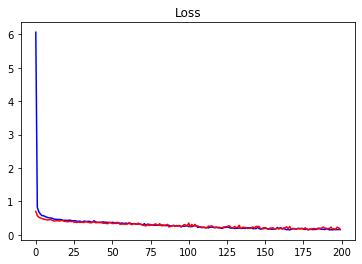

In [12]:
plt.subplot(111)
plt.title('Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='red', label='train')


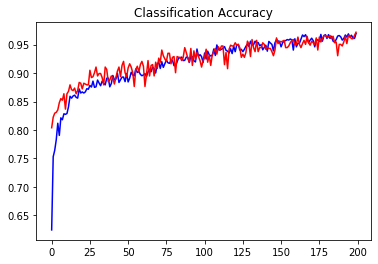

In [13]:
plt.subplot(111)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='red', label='train')

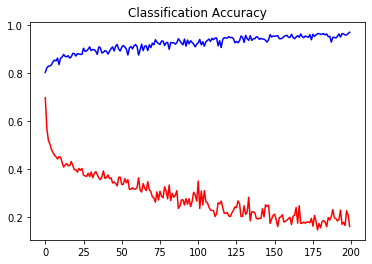

In [14]:
plt.subplot(111)
plt.title('Classification Accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='train') # UP IS GOOD
plt.plot(history.history['val_loss'], color='red', label='train') # DOWN IS GOOD
# UP UP IS BAD = OVERFITTING
# acc DOWN loss UP IS BAD = NOT LEARNING 

In [15]:
from sklearn.metrics import classification_report
lb = LabelBinarizer()

print("[INFO] evaluating network...")
predictions = model.predict(x=testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
    predictions.argmax(axis=1), target_names=dirs))

[INFO] evaluating network...
              precision    recall  f1-score   support

       guard       0.99      1.00      1.00       169
         jab       0.97      0.97      0.97       326
    uppercut       0.95      0.95      0.95       209

    accuracy                           0.97       704
   macro avg       0.97      0.97      0.97       704
weighted avg       0.97      0.97      0.97       704



In [16]:
model.save(DEFAULTCWD + 'final_model6.h5')

## Predicting

In [17]:
from keras.models import load_model
from decimal import Decimal

# load model
loadedModel = load_model('final_model5_good.h5')
jab1 = np.array([[[[1236.63,303.692,0.834197],[1336.76,362.516,0.638253],[1286.77,389.049,0.566805],[1257.21,503.696,0.553584],[1213.26,389.018,0.599918],[1383.79,339.01,0.630664],[1263.21,338.885,0.581837],[1186.64,338.905,0.417541],[1345.51,656.879,0.531741],[1304.42,656.827,0.529901],[1280.91,880.518,0.737282],[1286.68,1074.88,0.373105],[1378.03,662.695,0.511506],[1375.01,909.993,0.790882],[0,0,0],[0,0,0],[1242.59,288.834,0.838842],[0,0,0],[1304.23,274.237,0.842388],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[1292.56,1074.9,0.159261]]]])
guard = np.array([[[[1242.5,288.903,0.842958],[1351.52,362.463,0.827891],[1301.41,365.414,0.659089],[1289.64,483.129,0.375675],[1251.41,412.637,0.489724],[1410.35,359.481,0.707714],[1374.97,503.847,0.865088],[1280.92,385.915,0.824042],[1336.78,668.605,0.584321],[1289.62,665.661,0.569115],[1280.77,886.473,0.701639],[1292.59,1074.89,0.199699],[1386.77,671.525,0.543603],[1398.47,912.955,0.738666],[0,0,0],[1239.68,268.418,0.117724],[1257.25,268.2,0.916847],[0,0,0],[1316.11,262.419,0.833294],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[1304.22,1074.91,0.0680288]]]])
zero = np.array([[[[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]]]])
jab2 = np.array([[[[954.111,271.155,0.962893],[1021.87,365.389,0.869893],[930.657,362.538,0.725718],[821.642,386.018,0.845439],[762.802,327.208,0.781711],[1110.11,365.464,0.795738],[1163.16,480.166,0.898922],[1051.29,365.496,0.799284],[1018.8,671.504,0.594384],[954.003,671.515,0.593353],[948.112,889.402,0.644103],[948.165,1074.87,0.435388],[1077.75,671.561,0.563232],[1092.56,889.4,0.749573],[1104.22,1074.9,0.0502091],[951.099,250.696,0.896254],[977.516,250.678,0.954135],[0,0,0],[1024.89,262.5,0.866688],[0,0,0],[0,0,0],[0,0,0],[927.597,1074.86,0.129198],[0,0,0],[951.194,1074.89,0.203952]]]])
results = loadedModel.predict(testX)

labels = np.argmax(results, axis = 1)
counter = [0,0,0]
totalCounter = [0,0,0]

for desiredlbl in range(len(dirs)):
    count = 0
    for result in results:
        if labels[count] == desiredlbl:
            print(str(labels[count]) +" "+ str(round(Decimal(result[labels[count]]*100),2)))
        count += 1
    
count = 0
for result in results:
    if 70 < round(Decimal(result[labels[count]]*100),2):
        counter[labels[count]] += 1
        
    totalCounter[labels[count]] += 1
    count += 1
    

    # 1 == Jab, 0 == Guard



0 95.69656848907470703125 4.29882109165191650390625
0 98.274028301239013671875 1.725567318499088287353515625
0 99.1002142429351806640625 0.8997076191008090972900390625
0 99.0768849849700927734375 0.923023931682109832763671875
0 97.2259581089019775390625 2.772785909473896026611328125
0 97.51799106597900390625 2.480737864971160888671875
0 99.802005290985107421875 0.189767149277031421661376953125
0 95.693290233612060546875 4.30407337844371795654296875
0 99.99830722808837890625 0.0016887688616407103836536407470703125
0 98.45879077911376953125 1.5410331077873706817626953125
0 99.9811351299285888671875 0.0181871684617362916469573974609375
0 99.900972843170166015625 0.0960396020673215389251708984375
0 99.989616870880126953125 0.01032494401442818343639373779296875
0 99.9358832836151123046875 0.05879797390662133693695068359375
0 98.701941967010498046875 1.2978802435100078582763671875
0 99.986362457275390625 0.0134955116664059460163116455078125
0 99.1074264049530029296875 0.892516877502202987670

In [18]:
print("Guard got "+str(counter[0])+'/'+str(totalCounter[0]))
print("Jab got "+str(counter[1])+'/'+str(totalCounter[1]))
print("Uppercut got "+str(counter[2])+'/'+str(totalCounter[2]))
print("Total: "+str(count))


Guard got 372/373
Jab got 126/141
Uppercut got 177/190
Total: 704
Total % 859.6234917640686035156250159
Out of 35200.0 Predictions


In [19]:
from sklearn.metrics import confusion_matrix as confusion_matrix
confusion_matrix(testY.argmax(axis=1), results.argmax(axis=1))

array([[164,   5,   0],
       [209, 113,   4],
       [  0,  23, 186]], dtype=int64)